<a href="https://colab.research.google.com/github/2303A52439/AIML_2303A52439/blob/main/AIML_LAB_07_(2439)_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

K.Vignanand Rao

2303A52439

Implement Support Vector Machine Classification using Breast Cancer Dataset

In machine learning, support vector machines (SVMs, also support vector networks) are
supervised learning models with associated learning algorithms that analyze data used for
classification and regression analysis.
An SVM model is a representation of the examples as points in space, mapped so that
the examples of the separate categories are divided by a clear gap that is as wide as possible.
New examples are then mapped into that same space and predicted to belong to a category
based on which side of the gap they fall. This gap is also called maximum margin and the
SVM classifier is called maximum margin clasifier.
In addition to performing linear classification, SVMs can efficiently perform a non-linear
classification using what is called the kernel trick, implicitly mapping their inputs into high-
dimensional feature spaces

1. Import the Libraries required for SVM.

• Import all libraries required along with visualization to completed the task on SVM

In [14]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

2. Import the Breast Cancer Dataset from Sklearn Packages.

• Once downloaded the Breast Cancer data, prepare the dictionary format to access the data using its keys.

• Describe all the features from the dictionary, feature names.

• Setup the dataframe , describe itd details, check for missing values.

• Identify the target class and assign it to the dataframe.

• Perform exploratory analysis of dataframe using seabon - sns package

• the Draw the boxplot of first 10 columns to verify their role in cancer.


Feature Names:
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']

DataFrame Description:
       mean radius  mean texture  mean perimeter    mean area  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.3700

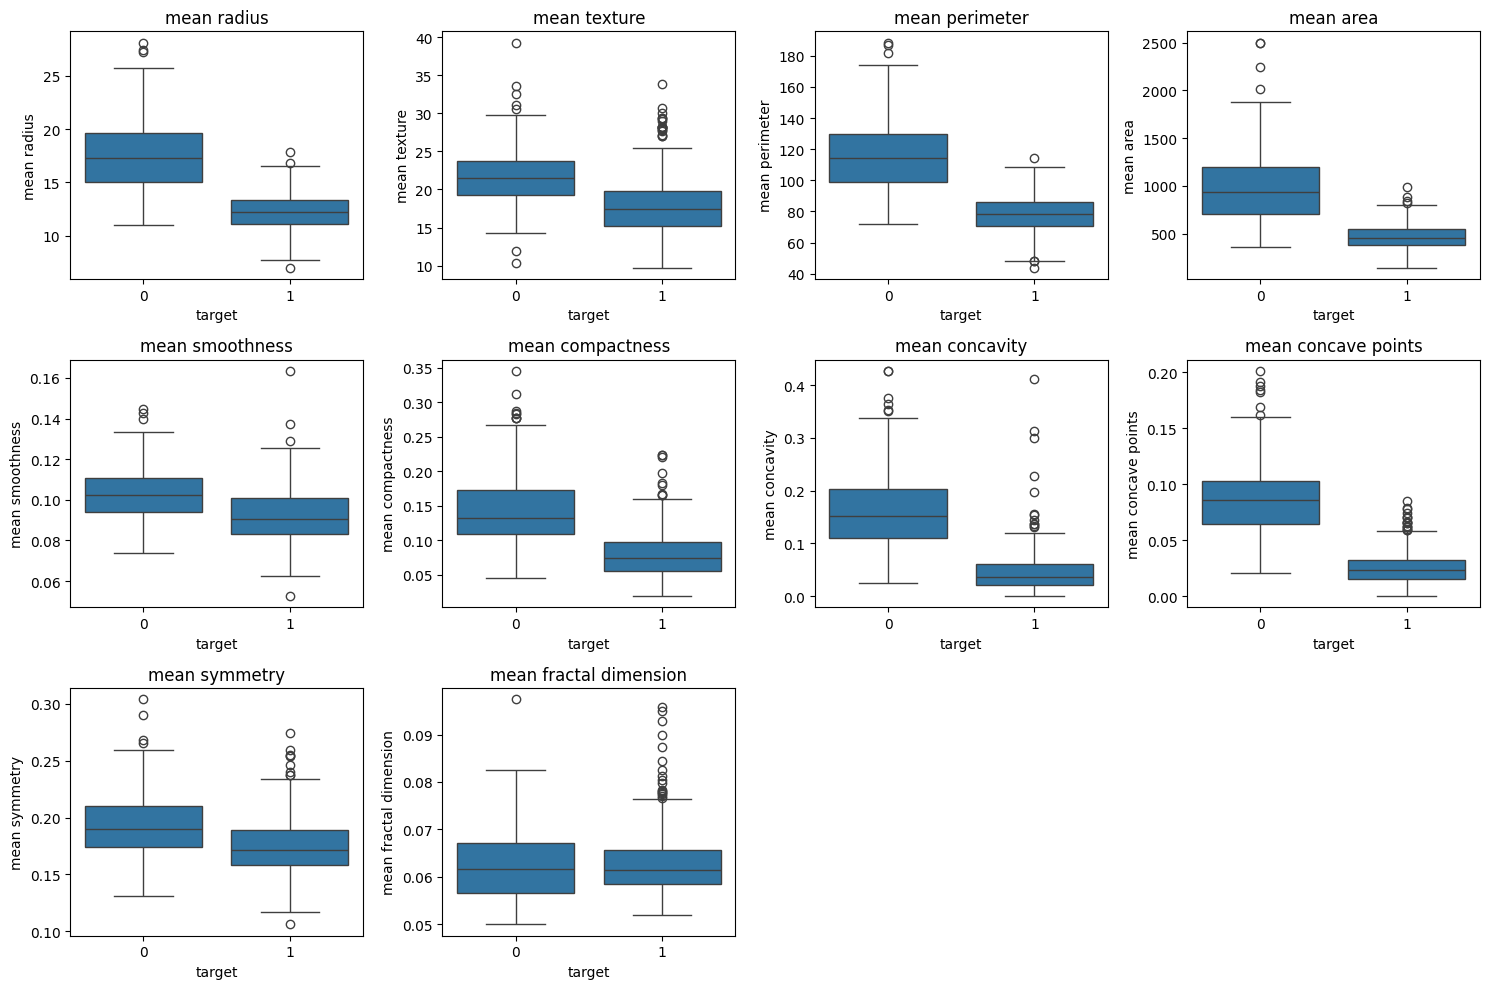

In [15]:
data = load_breast_cancer()
cancer_data = {
    'data': data.data,
    'feature_names': data.feature_names,
    'target': data.target,
    'target_names': data.target_names
    }
feature_names = cancer_data['feature_names']
print("Feature Names:")
print(feature_names)
df = pd.DataFrame(data.data, columns=feature_names)
df['target'] = data.target
print("\nDataFrame Description:")
print(df.describe())
print("\nMissing Values:")
print(df.isnull().sum())
plt.figure(figsize=(15, 10))
for i in range(10):
    plt.subplot(3, 4, i+1)
    sns.boxplot(x='target', y=feature_names[i], data=df)
    plt.title(feature_names[i])
plt.tight_layout()
plt.show()

3. Train and Test Data

• Prepare the Train and Test data from the dataframe.

• Drop the cancer columns and define the dataframe with only target results

• Split the data into train, test using train test split

In [16]:
X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

4. Train the SVC using the Train Dataset

• import sklearn.svm import SVC
• Apply the model.fit to dataset

In [17]:
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)


SVC(kernel='linear')

5. Predict and Analysis the Performance of the SVC Model.

• Apply model.predict(X test)

• Generate the classification report, confusion matrix using sklearn.metrics

In [18]:
y_pred = svm_model.predict(X_test)
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[39  4]
 [ 1 70]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.91      0.94        43
           1       0.95      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



6. Improve the Accuracy of Model using GridSearchCV Model.

• Given the following parameters validate the GridSearchCV Model:
param grid = ’C’: [0.1,1, 10, 100, 1000], ’gamma’: [1,0.1,0.01,0.001,0.0001],
’kernel’: [’rbf’]

• Implement the model.predict

• Generate the classification report, confusion matrix using sklearn.metrics

In [19]:
param_grid = {
    'C': [0.1, 1, 10, 100, 1000],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    'kernel': ['rbf']
}
grid_search = GridSearchCV(SVC(), param_grid, refit=True, verbose=2)
grid_search.fit(X_train, y_train)
print("\nBest Parameters:")
print(grid_search.best_params_)
grid_y_pred = grid_search.predict(X_test)
print("\nConfusion Matrix after GridSearchCV:")
print(confusion_matrix(y_test, grid_y_pred))
print("\nClassification Report after GridSearchCV:")
print(classification_report(y_test, grid_y_pred))


Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.0